In [1]:
# 07-28 updated transf_pos, transf_neg
# 07-29 continuous values, random state

from numpy.random import RandomState

import numpy as np
np.set_printoptions(precision=2,suppress=True)

import matplotlib.pyplot as plt
import seaborn as sns
import pdb
import scipy.optimize as opt
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from math import *

from scipy.optimize import basinhopping,minimize,differential_evolution
from scipy.stats import moment

In [2]:
# basis functions, phi_pos, phi_neg
def transf_pos(x,K=2.0,y0=0.001,ym=1.5,n=2):
    result=ym*((x/K)**n)/(1+(x/K)**n)+ym*y0
    return result

def transf_neg(x,K=2.0,y0=0.001,ym=1.5,n=2):
    result=ym/(1+(x/K)**n)+y0*ym
    return result

In [3]:
def noisy(vector):
    result=[]
    for i in range(0,len(vector)):
        v=vector.copy()
        v[i]=np.logical_not(vector[i]).astype(int)
        #print(i,vector[i],v[i])
        result.append(v)
    return result

In [5]:
def noisy(vector):
    result=[]
    for i in range(0,len(vector)):
        v=vector.copy()
        v[i]=np.logical_not(vector[i]).astype(int)
        #print(i,vector[i],v[i])
        result.append(v)
    return result

In [6]:
zv_5x5=[1,1,1,0,0,\
        0,0,1,0,0,\
        0,0,1,0,0,\
        0,0,1,0,0,\
        0,0,1,1,1]

zv_7x7=[1,1,1,1,0,0,0,\
        0,0,0,1,0,0,0,\
        0,0,0,1,0,0,0,\
        0,0,0,1,0,0,0,\
        0,0,0,1,0,0,0,\
        0,0,0,1,0,0,0,\
        0,0,0,1,1,1,1]

zv_9x9=[1,1,1,1,1,0,0,0,0,\
        0,0,0,0,1,0,0,0,0,\
        0,0,0,0,1,0,0,0,0,\
        0,0,0,0,1,0,0,0,0,\
        0,0,0,0,1,0,0,0,0,\
        0,0,0,0,1,0,0,0,0,\
        0,0,0,0,1,0,0,0,0,\
        0,0,0,0,1,0,0,0,0,\
        0,0,0,0,1,1,1,1,1]    

In [7]:
vv_5x5=[1,0,0,0,1,\
        1,0,0,0,1,\
        1,0,0,0,1,\
        0,1,0,1,0,\
        0,0,1,0,0]

vv_7x7=[1,0,0,0,0,0,1,\
        1,0,0,0,0,0,1,\
        1,0,0,0,0,0,1,\
        1,0,0,0,0,0,1,\
        0,1,0,0,0,1,0,\
        0,0,1,0,1,0,0,\
        0,0,0,1,0,0,0]

vv_9x9=[1,0,0,0,0,0,0,0,1,\
        1,0,0,0,0,0,0,0,1,\
        1,0,0,0,0,0,0,0,1,\
        1,0,0,0,0,0,0,0,1,\
        1,0,0,0,0,0,0,0,1,\
        0,1,0,0,0,0,0,1,0,\
        0,0,1,0,0,0,1,0,0,\
        0,0,0,1,0,1,0,0,0,\
        0,0,0,0,1,0,0,0,0]    

In [8]:
nv_5x5=[0,0,0,0,0,\
        0,1,1,1,0,\
        1,0,0,0,1,\
        1,0,0,0,1,\
        1,0,0,0,1]

nv_7x7=[0,0,0,0,0,0,0,\
        0,0,0,0,0,0,0,\
        0,1,1,1,1,1,0,\
        1,0,0,0,0,0,1,\
        1,0,0,0,0,0,1,\
        1,0,0,0,0,0,1,\
        1,0,0,0,0,0,1]

nv_9x9=[0,0,0,0,0,0,0,0,0,\
        0,0,0,0,0,0,0,0,0,\
        0,0,1,1,1,1,1,0,0,\
        0,1,0,0,0,0,0,1,0,\
        1,0,0,0,0,0,0,0,1,\
        1,0,0,0,0,0,0,0,1,\
        1,0,0,0,0,0,0,0,1,\
        1,0,0,0,0,0,0,0,1,\
        1,0,0,0,0,0,0,0,1]

In [9]:
# 5x5
zpatterns=([zv_5x5]+noisy(zv_5x5))
vpatterns=([vv_5x5]+noisy(vv_5x5))
npatterns=([nv_5x5]+noisy(nv_5x5))

patterns_5x5=zpatterns+vpatterns+npatterns

#--------
# 7x7
zpatterns=([zv_7x7]+noisy(zv_7x7))
vpatterns=([vv_7x7]+noisy(vv_7x7))
npatterns=([nv_7x7]+noisy(nv_7x7))

patterns_7x7=zpatterns+vpatterns+npatterns

#--------
# 9x9
zpatterns=([zv_9x9]+noisy(zv_9x9))
vpatterns=([vv_9x9]+noisy(vv_9x9))
npatterns=([nv_9x9]+noisy(nv_9x9))

patterns_9x9=zpatterns+vpatterns+npatterns

In [10]:
# updated 08-25

size=5*5
patterns=patterns_5x5

target_L=0.0
target_H=1.2
lenth=int(len(patterns)/3)

target_0=np.array([target_H]*lenth+[target_L]*lenth+[target_L]*lenth)
target_1=np.array([target_L]*lenth+[target_H]*lenth+[target_L]*lenth)
target_2=np.array([target_L]*lenth+[target_L]*lenth+[target_H]*lenth)

target=target_0
#----
AHL_unit_level=30 # 30x diuute
transf_p=np.zeros(2)
transf_n=np.zeros(2)

transf_p[0]=transf_pos(x=0,K=50,y0=0.1,ym=1.0,n=0.45)
transf_p[1]=transf_pos(x=AHL_unit_level,K=50,y0=0.1,ym=1.0,n=0.45)
transf_n[0]=transf_neg(x=0,K=0.252,y0=0.341,ym=735,n=0.67)
transf_n[1]=transf_neg(x=AHL_unit_level,K=0.252,y0=0.341,ym=735,n=0.67)
  
print(transf_p)
print(transf_n)

phi_pos=np.array([transf_p]*size)
phi_neg=np.array([transf_n]*size)

[0.1  0.54]
[985.63 279.36]


In [27]:
def examine_output_ct(w,P,phi_pos,phi_neg):
    y_n=np.zeros(len(P))
    w_ph_=np.zeros(len(P))
    
    for n in range(0,len(P)):
        pttn=np.array(P[n])
        
        phi_nw=(1.0+w/np.sqrt(w**2))/2*output_fcn(pttn,phi_pos)+\
            (1.0-w/np.sqrt(w**2))/2*output_fcn(pttn,phi_neg)/w
                
        #pdb.set_trace()
        w_ph_[n]=np.dot(w,phi_nw)/len(w)
        y_n[n]=activate(w_ph_[n])
        
    return y_n,w_ph_

def output_fcn(pttn,fcn):
    CHL_levels=np.zeros(len(pttn))
    for i in range(0,len(pttn)):
        CHL_levels[i]=fcn[i][pttn[i]]
        
    return CHL_levels

def activate(x):
    K,y0,ym_x,n= 1.10292919e+03,1.94584842e-02,2.15950963e+04,2.33038211e+00

    result=transf_pos(x.sum(),K=K,y0=y0/1e4,ym=2.0,n=n).sum()
    return result

In [29]:
def train_step1_ct(target,size,eta,phi_pos,phi_neg):
    rndstate=RandomState(2)
    w=rndstate.random_sample(size)
    print('w: ',w)
    r=size

    w_series=[]
    y_series=[]
    delta_series=[]

    for it in range(0,350):
        y_n=np.zeros(len(patterns))
        g_n=np.zeros(len(patterns))
        delta_err=np.zeros(size)
        phi_n=[]
    
        for n in range(0,len(patterns)):
            pttn=np.array(patterns[n])
            # consider pttn as indexes in vector x, 0 means x[0], 1 means x[1]
        
            phi_nw=(1.0+w/np.sqrt(w**2))/2*output_fcn(pttn,phi_pos)+\
                (1.0-w/np.sqrt(w**2))/2*output_fcn(pttn,phi_neg)/w

            g_n[n]=np.dot(w,phi_nw)/r
            y_n[n]=activate(g_n[n])            
            
            tmp=(y_n[n]-target[n])#/g_n[n]
            tmp=min(target_H,tmp)
            
            phi_nw_pos=(1.0+w/np.sqrt(w**2))/2*output_fcn(pttn,phi_pos)    
            
            delta_err+=tmp*phi_nw_pos#/g_n[n]
        
        w=w-eta*delta_err 
        y_series.append(y_n)
        w_series.append(w)
        delta_series.append(delta_err)
     
    return w,y_series,w_series,delta_series

In [65]:
# 08-25-2020
# 07-28-2020
# continuous values
# size: size, 2


size=5*5
patterns=patterns_5x5

rnd_state=RandomState(1)
rand_seq=0.6*rnd_state.random_sample(size)+0.4
print('rand_seq: ',rand_seq)

target_L=0.0
target_H=1.2
lenth=int(len(patterns)/3)

target_0=np.array([target_H]*lenth+[target_L]*lenth+[target_L]*lenth)
target_1=np.array([target_L]*lenth+[target_H]*lenth+[target_L]*lenth)
target_2=np.array([target_L]*lenth+[target_L]*lenth+[target_H]*lenth)

#==============
AHL_unit_level=30   # 30x diuute
transf_p=np.zeros(2)
transf_n=np.zeros(2)

transf_p[0]=transf_pos(x=0,K=50,y0=0.1,ym=1.0,n=0.45)
transf_p[1]=transf_pos(x=AHL_unit_level,K=50,y0=0.1,ym=1.0,n=0.45)
transf_n[0]=transf_neg(x=0,K=0.252,y0=0.341,ym=735,n=0.67)
transf_n[1]=transf_neg(x=AHL_unit_level,K=0.252,y0=0.341,ym=735,n=0.67)
  
print(transf_p)
print(transf_n)

phi_pos=np.array([transf_p]*size)
phi_neg=np.array([transf_n]*size)

phi_pos_ct=np.zeros(shape=phi_pos.shape)
phi_neg_ct=np.zeros(shape=phi_neg.shape)

phi_pos_ct.T[0]=phi_pos.T[0]
phi_pos_ct.T[1]=phi_pos.T[1]*rand_seq

phi_neg_ct.T[0]=phi_neg.T[0]
phi_neg_ct.T[1]=phi_neg.T[1]*(2-rand_seq)

rand_seq:  [0.65 0.83 0.4  0.58 0.49 0.46 0.51 0.61 0.64 0.72 0.65 0.81 0.52 0.93
 0.42 0.8  0.65 0.74 0.48 0.52 0.88 0.98 0.59 0.82 0.93]
[0.1  0.54]
[985.63 279.36]


In [71]:
#w0_ct_5x5,y_ct_5x5_series0,_,_=train_step1_ct(target_0,size=5**2,eta=3.2, phi_pos=phi_pos_ct,phi_neg=phi_neg_ct)
#output_w0_ct_5x5_0,_=examine_output_ct(w0_ct_5x5,patterns,phi_pos_ct,phi_neg_ct)
#w0_ct_5x5_=", ".join("%.0f" % f for f in w0_ct_5x5)
#print(w0_ct_5x5_)

#w1_ct_5x5,y_ct_5x5_series1,_,_=train_step1_ct(target_1,size=5**2,eta=4.0, phi_pos=phi_pos_ct,phi_neg=phi_neg_ct)
#output_w1_ct_5x5_0,_=examine_output_ct(w1_ct_5x5,patterns,phi_pos_ct,phi_neg_ct)
#w1_ct_5x5_=", ".join("%.0f" % f for f in w1_ct_5x5)
#print(w1_ct_5x5_)

#w2_ct_5x5,y_ct_5x5_series2,_,_=train_step1_ct(target_2,size=5**2,eta=3.2, phi_pos=phi_pos_ct,phi_neg=phi_neg_ct)
#output_w2_ct_5x5_0,_=examine_output_ct(w2_ct_5x5,patterns,phi_pos_ct,phi_neg_ct)
w2_ct_5x5_=", ".join("%.0f" % f for f in w2_ct_5x5)
print(w2_ct_5x5_)

#-----------
#w0_ct_7x7,y_ct_7x7_series0,_,_=train_step1_ct(target_0,size=7**2,eta=2.2, phi_pos=phi_pos_ct,phi_neg=phi_neg_ct)
#output_w0_ct_7x7_0,_=examine_output_ct(w0_ct_7x7,patterns,phi_pos_ct,phi_neg_ct)
#w0_ct_7x7_=", ".join("%.0f" % f for f in w0_ct_7x7)
#print(w0_ct_7x7_)

#w1_ct_7x7,y_ct_7x7_series1,_,_=train_step1_ct(target_1,size=7**2,eta=2.2, phi_pos=phi_pos_ct,phi_neg=phi_neg_ct)
#output_w1_ct_7x7_0,_=examine_output_ct(w1_ct_7x7,patterns,phi_pos_ct,phi_neg_ct)
#w1_ct_7x7_=", ".join("%.0f" % f for f in w1_ct_7x7)
#print(w1_ct_7x7_)

#w2_ct_7x7,y_ct_7x7_series2,_,_=train_step1_ct(target_2,size=7**2,eta=2.0, phi_pos=phi_pos_ct,phi_neg=phi_neg_ct)
#output_w2_ct_7x7_0,_=examine_output_ct(w2_ct_7x7,patterns,phi_pos_ct,phi_neg_ct)
#w2_ct_7x7_=", ".join("%.0f" % f for f in w2_ct_7x7)
#print(w2_ct_7x7_)

-1, -2, 815, 1415, 836, 888, 4975, 4951, 6373, 466, 5670, 1468, 532, 1493, 3488, 8170, 582, 43, 843, 5053, 9014, 1504, -8, -5, 7620


In [62]:
#w0_ct_9x9,y_ct_9x9_series0,_,_=train_step1_ct(target_0,size=9**2,eta=1.5, phi_pos=phi_pos_ct,phi_neg=phi_neg_ct)
#output_w0_ct_9x9_0,_=examine_output_ct(w0_ct_9x9,patterns,phi_pos_ct,phi_neg_ct)
#w0_ct_9x9_=", ".join("%.0f" % f for f in w0_ct_9x9)
#print(w0_ct_9x9_)

#w1_ct_9x9,y_ct_9x9_series1,_,_=train_step1_ct(target_1,size=9**2,eta=1.5, phi_pos=phi_pos_ct,phi_neg=phi_neg_ct)
#output_w1_ct_9x9_0,_=examine_output_ct(w1_ct_9x9,patterns,phi_pos_ct,phi_neg_ct)
#w1_ct_9x9_=", ".join("%.0f" % f for f in w1_ct_9x9)
#print(w1_ct_9x9_)

#w2_ct_9x9,y_ct_9x9_series2,_,_=train_step1_ct(target_2,size=9**2,eta=1.5, phi_pos=phi_pos_ct,phi_neg=phi_neg_ct)
#output_w2_ct_9x9_0,_=examine_output_ct(w2_ct_9x9,patterns,phi_pos_ct,phi_neg_ct)
#w2_ct_9x9_=", ".join("%.0f" % f for f in w2_ct_9x9)
#print(w2_ct_9x9_)

-9, -3, 1166, 610, 896, 1860, 1867, 1878, 550, 310, 1883, 1902, 1868, -3, 1855, 1901, 1884, 277, 984, 1867, 12884, 14472, 6963, 11854, 13601, 1916, 1077, 1154, 6880, 1914, 1861, 391, 1920, 1891, 11850, 687, 9959, 1912, 1855, 1906, -1, 1906, 1874, 1908, 5430, 9530, -0, 1875, 1874, 928, 1855, 1901, 863, 7793, 9945, 1857, 250, 1864, 83, 1903, 1048, 1883, 11874, 9208, 1857, 1891, 99, 219, -8, 1895, 1916, 6571, 6589, 1910, 1882, 1866, -6, 526, -9, -1, 11295


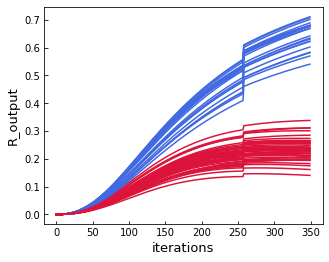

In [67]:
fig=plt.figure(figsize=(5,4))
ax=fig.add_subplot(111)

target=target_1
y_series=y_ct_5x5_series1

for i in range(0,len(patterns)):
    if target[i]==target_H:
        ax.plot(np.array(y_series).T[i],color='royalblue')
        
    if target[i]==target_L:
        ax.plot(np.array(y_series).T[i],color='crimson')
    
ax.set_xlabel('iterations',fontsize=13)
ax.set_ylabel('R_output',fontsize=13)
ax.tick_params(direction='in')

#fig_path='/Users/ximing/Documents/technion_stuff/figures/'
#plt.savefig(fig_path+'Routput_iterations.png',dpi=300)

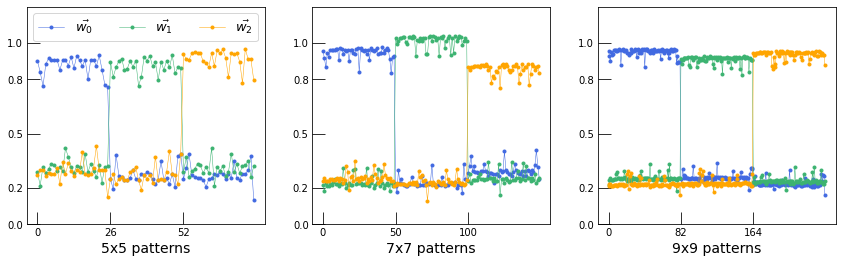

In [72]:
ymax=1.2

fig=plt.figure(figsize=(14.5,4))
#=======
ax=fig.add_subplot(131)

line0,=ax.plot(np.arange(0,len(output_w0_ct_5x5_0)),output_w0_ct_5x5_0,marker='.',lw=0.5,color='royalblue',label='$\\vec{w_0}$')
line1,=ax.plot(np.arange(0,len(output_w1_ct_5x5_0)),output_w1_ct_5x5_0,marker='.',lw=0.5,color='mediumseagreen',label='$\\vec{w_1}$')
line2,=ax.plot(np.arange(0,len(output_w2_ct_5x5_0)),output_w2_ct_5x5_0,marker='.',lw=0.5,color='orange',label='$\\vec{w_2}$')
ax.set_ylim([0,ymax])
ax.tick_params(direction='in',size=12.5)
ax.set_yticks([0,0.2,0.5,0.8,1.0])
ax.set_xlabel('5x5 patterns',fontsize=14)
ax.legend(loc='upper left',ncol=3,fontsize=13)
ax.set_xticks([0,26,52])
#=======
ax=fig.add_subplot(132)

ax.plot(np.arange(0,len(output_w0_ct_7x7_0)),output_w0_ct_7x7_0,marker='.',lw=0.5,color='royalblue')
ax.plot(np.arange(0,len(output_w1_ct_7x7_0)),output_w1_ct_7x7_0,marker='.',lw=0.5,color='mediumseagreen')
ax.plot(np.arange(0,len(output_w2_ct_7x7_0)),output_w2_ct_7x7_0,marker='.',lw=0.5,color='orange')
ax.set_ylim([0,ymax])
ax.tick_params(direction='in',size=12.5)
ax.set_yticks([0,0.2,0.5,0.8,1.0])
ax.set_xlabel('7x7 patterns',fontsize=14)
ax.set_xticks([0,50,100])



#=======
ax=fig.add_subplot(133)

ax.plot(np.arange(0,len(output_w0_ct_9x9_0)),output_w0_ct_9x9_0,marker='.',lw=0.5,color='royalblue')
ax.plot(np.arange(0,len(output_w1_ct_9x9_0)),output_w1_ct_9x9_0,marker='.',lw=0.5,color='mediumseagreen')
ax.plot(np.arange(0,len(output_w2_ct_9x9_0)),output_w2_ct_9x9_0,marker='.',lw=0.5,color='orange')
ax.set_ylim([0,ymax])
ax.tick_params(direction='in',size=12.5)
ax.set_yticks([0,0.2,0.5,0.8,1.0])
ax.set_xlabel('9x9 patterns',fontsize=14)
ax.set_xticks([0,82,164])


fig_path='/Users/ximing/Documents/technion_stuff/figures/'
plt.savefig(fig_path+'nonbinary_patterns.png',dpi=400)

In [1288]:
# 5x5 patterns with graded intensities, by adjusting the opacity
#np.array(zv_5x5)*rand_seq
#np.array(vv_5x5)*rand_seq
#np.array(nv_5x5)*rand_seq

#np.array(zv_7x7)*rand_seq
#np.array(vv_7x7)*rand_seq
#np.array(nv_7x7)*rand_seq

#np.array(zv_9x9)*rand_seq
#np.array(vv_9x9)*rand_seq
#np.array(nv_9x9)*rand_seq